In [1]:
%matplotlib inline

# K-Means Clustering: A Foundational Approach to Unsupervised Learning

In this notebook, we explore the K-Means clustering algorithm; a simple yet powerful method for uncovering structure in unlabeled data. We'll walk through:

- Generating synthetic data
- Applying K-Means with varying cluster counts
- Using the Elbow Method to find the optimal number of clusters
- Evaluating cluster quality with Silhouette Score and Davies–Bouldin Index
- Visualizing clusters and centroids using PCA

You can find the [blog post](https://medium.com/@alikhalaji/clustering-demystified-a-gentle-dive-into-k-means-c3b4113c74e7) on Medium referenced in this notebook.


## Step 1: Finding the Optimal Number of Clusters with the Elbow Method

We generate a synthetic dataset and apply K-Means for different values of K (1 to 10). By plotting the inertia values, we can identify the "elbow point", the value of K where adding more clusters yields diminishing returns.


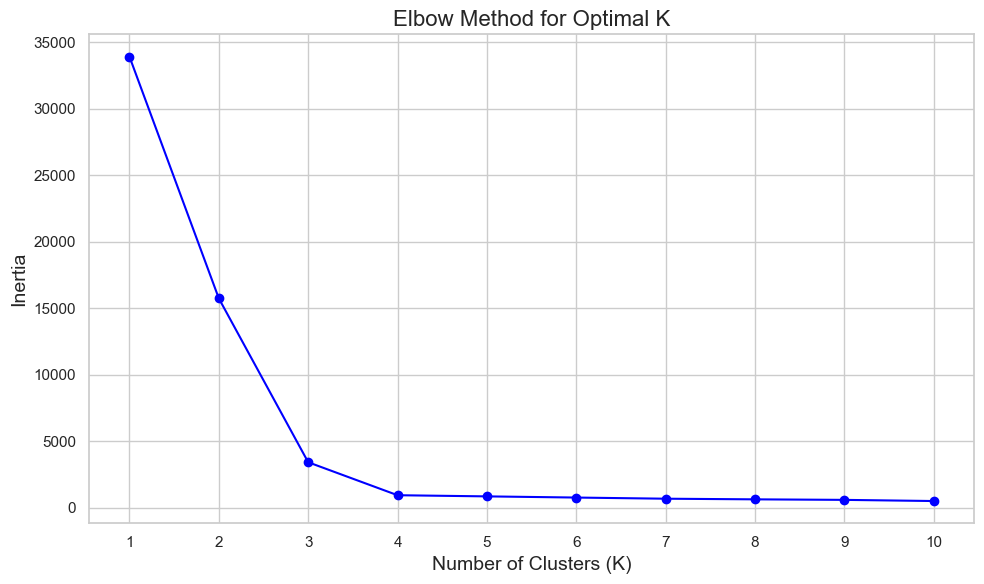

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Set seaborn style for better aesthetics
sns.set(style='whitegrid')

# Step 1: Generate synthetic dataset with 200 samples and 2 features
X, _ = make_blobs(n_samples=500, centers=4, n_features=2, random_state=42)

# Step 2 & 3: Fit KMeans for K=1 to K=10 and store inertia values
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Step 4: Plot the inertia values to visualize the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.savefig('elbow_method.png')
plt.show()



## Step 2: Evaluating Cluster Quality

Using the optimal number of clusters (K=4), we assess the clustering performance with:

- **Silhouette Score**: Measures how similar a point is to its own cluster vs. other clusters.
- **Davies–Bouldin Index**: Lower values indicate better separation between clusters.


In [3]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Use the optimal number of clusters from elbow method (e.g., K=4)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Evaluate cluster quality
sil_score = silhouette_score(X, labels)
db_index = davies_bouldin_score(X, labels)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies–Bouldin Index: {db_index:.3f}")


Silhouette Score: 0.791
Davies–Bouldin Index: 0.294


## Step 3: Visualizing Clusters with PCA

Although our data is already 2D, we apply PCA for consistency and visualization. This helps us see how well the clusters are separated.


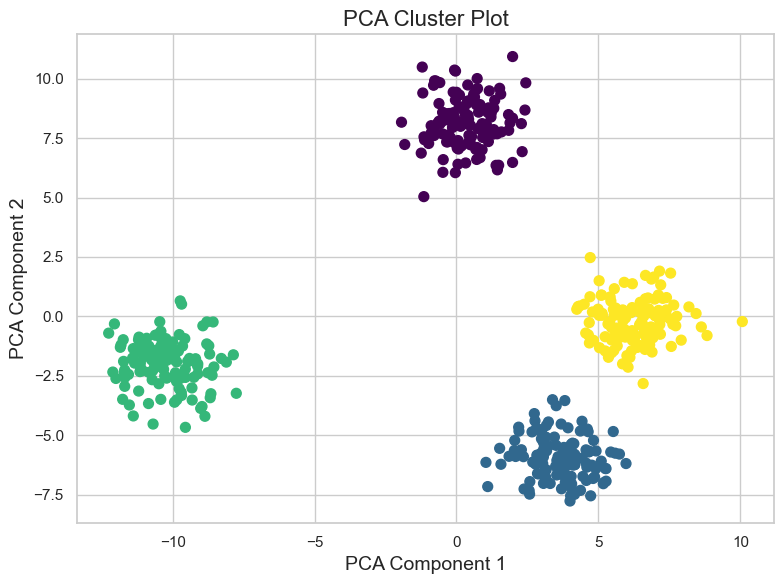

In [4]:
# Visualize clusters using PCA (even though X is 2D, this keeps it consistent)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("PCA Cluster Plot", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("cluster_visualization.png")  # Save the plot
plt.show()
plt.close()  # Close the plot

## Step 4: Inspecting Cluster Centroids

We print the coordinates of each cluster centroid to understand where K-Means has positioned the centers.


In [5]:
# Display cluster centroids
centroids = kmeans.cluster_centers_
for i, center in enumerate(centroids):
    print(f"Cluster {i}: Centroid at {center}")


Cluster 0: Centroid at [4.72182456 1.9238556 ]
Cluster 1: Centroid at [-8.68153751  7.4554521 ]
Cluster 2: Centroid at [-7.0009649  -6.90445754]
Cluster 3: Centroid at [-2.60221541  9.09243505]


## Step 5: Visualizing Clusters with Centroids

We overlay the cluster centroids on the PCA scatter plot to see how well they represent the data distribution.


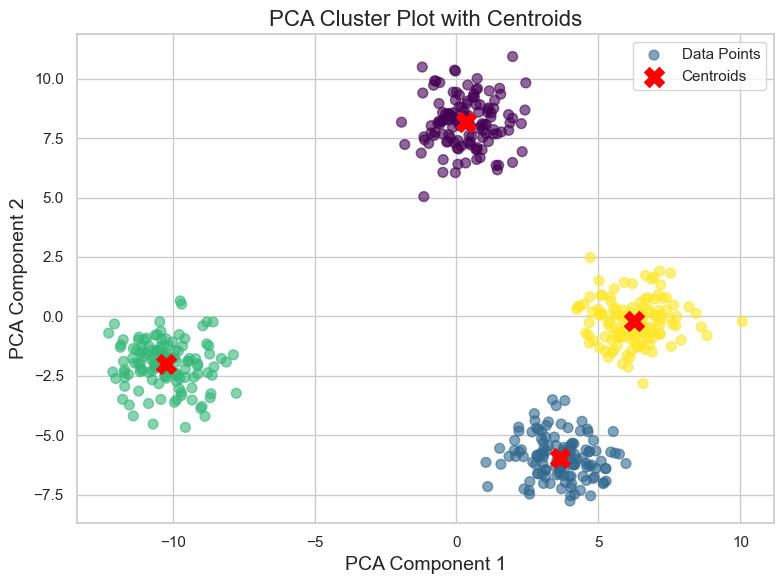

In [6]:
# Visualize clusters with centroids
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, label='Data Points')

# Project centroids into PCA space
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title("PCA Cluster Plot with Centroids", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("cluster_centroids_plot.png")
plt.show()
plt.close()


# Wrapping Up: When Simplicity Meets Complexity

K-Means offers a clean, intuitive approach to clustering; ideal when your data behaves. But we’ve acknowledged its limitations: it assumes spherical clusters, equal density, and a known number of groups. Crucially, **K-Means struggles with varying cluster shapes, noise or outliers, and non-convex structures**, making it less effective when the data gets messy.


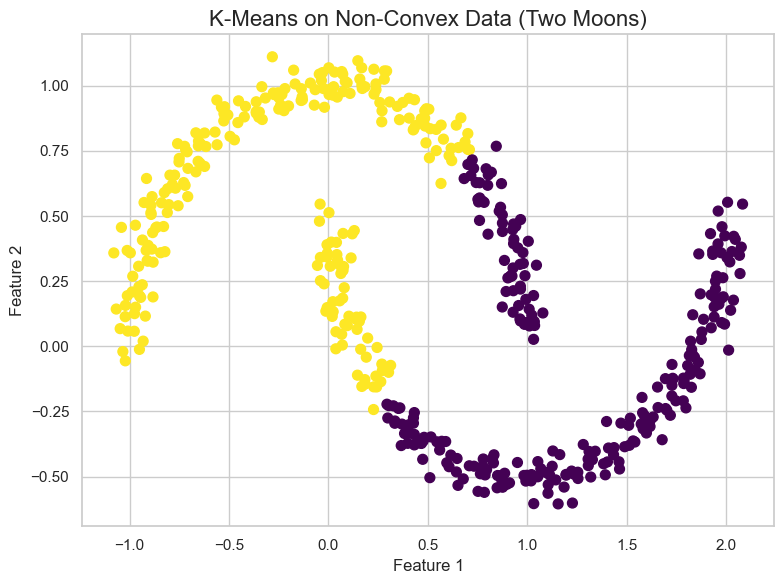

In [8]:
# Create a dataset with two moons (non-convex shapes)
from sklearn.datasets import make_moons
X_moons, _ = make_moons(n_samples=500, noise=0.05, random_state=42)

# Apply K-Means
kmeans_moons = KMeans(n_clusters=2, random_state=42)
labels_moons = kmeans_moons.fit_predict(X_moons)

# Plot result
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, cmap='viridis', s=50)
plt.title("K-Means on Non-Convex Data (Two Moons)", fontsize=16)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.savefig("kmeans_two_moons.png")
plt.show()


That’s why it’s important to explore alternatives.
